In [43]:
%matplotlib inline

In [44]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import pandas.io.data as web

from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay, CustomBusinessMonthBegin

In [45]:
start_date = dt.datetime(1988, 1, 1)
end_date = dt.datetime(2015, 12, 31)

In [46]:
ticker_list = {
                'VUSTX': 'Long-Term Treasury',
                'VWESX': 'Long-Term Investment-Grade Fund',
                'VWEHX': 'High-Yield Corporate',
                '^GSPC': 'S&P Index',
              }

In [47]:
df = pd.io.data.get_data_yahoo(['VUSTX', 'VWESX', 'VWEHX', '^GSPC'], 
                               start_date, 
                               end_date)['Adj Close']

In [48]:
df.head()

,VUSTX,VWEHX,VWESX,^GSPC
Date,,,,
1988-01-04,1.315441,0.744287,1.042935,255.940002
1988-01-05,1.318310,0.745180,1.044260,258.630005
1988-01-06,1.309703,0.746965,1.041609,258.890015
1988-01-07,1.306834,0.746072,1.037634,261.070007
1988-01-08,1.295358,0.746072,1.032333,243.399994


In [49]:
monthly = df.resample('BM', how=lambda x: x[-1])

In [50]:
monthly.head()

,VUSTX,VWEHX,VWESX,^GSPC
Date,,,,
1988-01-29,1.370763,0.768924,1.083714,257.070007
1988-02-29,1.386725,0.791903,1.102103,267.820007
1988-03-31,1.355698,0.788785,1.082242,258.890015
1988-04-29,1.340245,0.793911,1.071962,261.329987
1988-05-31,1.318948,0.793527,1.059720,262.160004


In [51]:
monthly_returns = monthly.pct_change()

In [55]:
monthly_returns.mean()

VUSTX    0.006867
VWEHX    0.006002
VWESX    0.006802
^GSPC    0.007077
dtype: float64

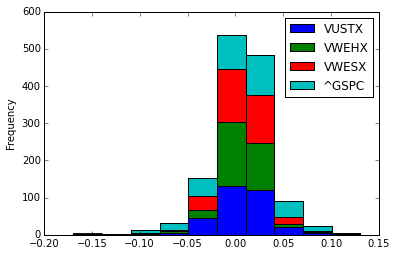

In [53]:
monthly_returns.plot.hist(stacked=True, bins = 10)
ply